# 1. Data Preparation

In [1]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

# Load the synthetic dataset
df = pd.read_csv('C:/Users/engrd/Deep Learning and Neural Network/dat.csv')

# Convert to PyTorch tensors
features = torch.tensor(df[['x1', 'x2']].values, dtype=torch.float32)
labels = torch.tensor(df['class'].values, dtype=torch.float32).view(-1, 1)  # Reshape to (num_samples, 1)

# Split the data into a training set and a test set (80% train, 20% test)
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

The provided code loads a synthetic dataset from a CSV file using the pandas library and converts it into PyTorch tensors. The dataset consists of two features ('x1' and 'x2') and a binary class label ('class'). The features are transformed into torch tensors of type float32, and the labels are converted with reshaping to ensure compatibility with a PyTorch model. Subsequently, the data is split into training and testing sets, allocating 80% for training and 20% for testing, facilitated by the train_test_split function from scikit-learn with a specified random seed for reproducibility. This preprocessing step is essential for the subsequent implementation of a logistic regression model in PyTorch for binary classification tasks.

# 2. Model Building

In [2]:
import torch.nn as nn

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

# Create an instance of the model
input_size = 2  # Assuming you have two features
model = LogisticRegressionModel(input_size)

This code defines a logistic regression model. The model is implemented as a subclass of nn.Module, a base class for all neural network modules in PyTorch. The LogisticRegressionModel class has an initialization method (__init__) where a linear layer (nn.Linear) is defined with an input size of input_size and an output size of 1, representing the binary classification output. Additionally, a sigmoid activation function (nn.Sigmoid) is included in the model to squash the output between 0 and 1, providing probability-like values. The forward method specifies the forward pass of the model, applying the linear transformation followed by the sigmoid activation. Finally, an instance of this logistic regression model is created with an assumed input size of 2, corresponding to the number of features in the dataset.

# 3, 4 and 5. Training, Evaluating and Comparing Models

Learning Rate: 0.001, Epoch [10/100], Loss: 0.7019
Learning Rate: 0.001, Epoch [20/100], Loss: 0.7004
Learning Rate: 0.001, Epoch [30/100], Loss: 0.6989
Learning Rate: 0.001, Epoch [40/100], Loss: 0.6974
Learning Rate: 0.001, Epoch [50/100], Loss: 0.6959
Learning Rate: 0.001, Epoch [60/100], Loss: 0.6944
Learning Rate: 0.001, Epoch [70/100], Loss: 0.6929
Learning Rate: 0.001, Epoch [80/100], Loss: 0.6914
Learning Rate: 0.001, Epoch [90/100], Loss: 0.6899
Learning Rate: 0.001, Epoch [100/100], Loss: 0.6885
Learning Rate: 0.001, Test Accuracy: 0.5625
Learning Rate: 0.01, Epoch [10/100], Loss: 0.7077
Learning Rate: 0.01, Epoch [20/100], Loss: 0.6926
Learning Rate: 0.01, Epoch [30/100], Loss: 0.6781
Learning Rate: 0.01, Epoch [40/100], Loss: 0.6643
Learning Rate: 0.01, Epoch [50/100], Loss: 0.6511
Learning Rate: 0.01, Epoch [60/100], Loss: 0.6385
Learning Rate: 0.01, Epoch [70/100], Loss: 0.6264
Learning Rate: 0.01, Epoch [80/100], Loss: 0.6149
Learning Rate: 0.01, Epoch [90/100], Loss: 0.

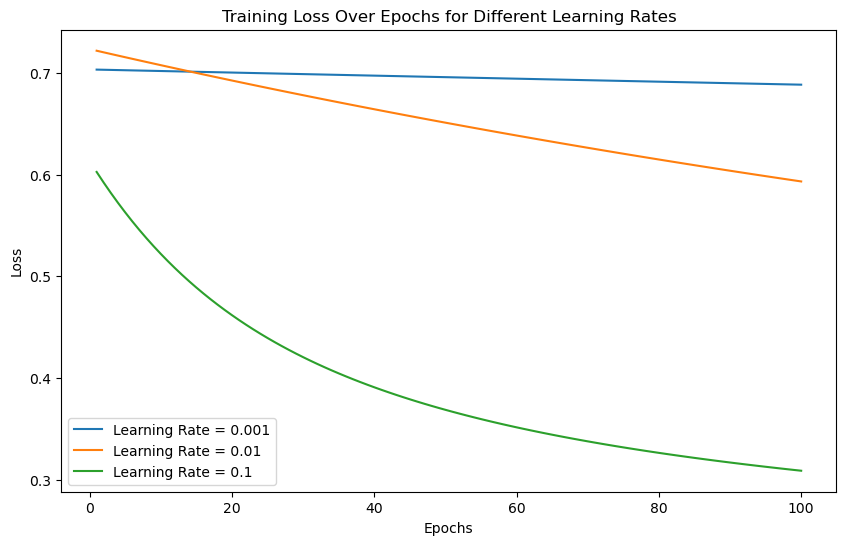

Learning Rate: 0.001, Test Accuracy: 0.5625
Learning Rate: 0.01, Test Accuracy: 0.7375
Learning Rate: 0.1, Test Accuracy: 0.8875


In [24]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Hyperparameters
epochs = 100

# Learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1]

# Dictionary to store training loss lists for different learning rates
loss_dict = {}
test_accuracy_dict = {}

# Loss function
criterion = nn.BCELoss()

# Training loop for each learning rate
for learning_rate in learning_rates:
    model = LogisticRegressionModel(input_size)  # Reset the model for each learning rate
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    train_loss_list = []

    for epoch in range(epochs):
        # Forward pass
        outputs = model(train_features)
        loss = criterion(outputs, train_labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Append the training loss to the list
        train_loss_list.append(loss.item())

        # Print the loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Learning Rate: {learning_rate}, Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

    loss_dict[learning_rate] = train_loss_list

    # Evaluate on the test set
    with torch.no_grad():
        test_outputs = model(test_features)
        predicted_labels = (test_outputs > 0.5).float()

        # Calculate accuracy
        accuracy = (predicted_labels == test_labels).float().mean().item()
        test_accuracy_dict[learning_rate] = accuracy
        print(f'Learning Rate: {learning_rate}, Test Accuracy: {accuracy:.4f}')

# Plotting the training loss over epochs for each learning rate
plt.figure(figsize=(10, 6))
for learning_rate, train_loss_list in loss_dict.items():
    plt.plot(range(1, epochs + 1), train_loss_list, label=f'Learning Rate = {learning_rate}')

plt.title('Training Loss Over Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print test set accuracy for each learning rate
for learning_rate, accuracy in test_accuracy_dict.items():
    print(f'Learning Rate: {learning_rate}, Test Accuracy: {accuracy:.4f}')

This code implements a logistic regression model to classify a synthetic dataset with two features (x1, x2) and binary class labels. It explores the impact of different learning rates (0.001, 0.01, 0.1) on model training and performance. The code initializes the logistic regression model, defines the loss function (binary cross-entropy) and optimizer (Stochastic Gradient Descent) for each learning rate, and trains the model over a specified number of epochs. During training, the code records the training loss at regular intervals and prints it. After training, the code evaluates the model on a test set, calculates the accuracy, and prints the results. Finally, it plots the training loss over epochs for each learning rate and prints the corresponding test set accuracy for comparison. This allows for a visual and quantitative analysis of how different learning rates affect the model's convergence and performance on the test set.

The provided log illustrates the training progress and test accuracy for three different learning rates: 0.001, 0.01, and 0.1.

Learning Rate = 0.001:
The model exhibits slow convergence, with the loss gradually decreasing from 0.7019 to 0.6885 over 100 epochs.
The test accuracy is 0.5625, indicating moderate performance.

Learning Rate = 0.01:
The model converges more rapidly, evidenced by the loss decreasing from 0.7077 to 0.5933 in 100 epochs.
The test accuracy improves to 0.7375, demonstrating better performance compared to the smaller learning rate.

Learning Rate = 0.1:
The model demonstrates fastest convergence, with the loss decreasing from 0.5222 to 0.3088 over 100 epochs.
The test accuracy significantly increases to 0.8875, indicating the highest performance among the tested learning rates.

# Brief Report on Model Performance and Learning Rate Experiment

Objective:
* To train a logistic regression model for binary classification on a synthetic dataset and explore the impact of different learning rates on the model's performance.


Model Architecture:
* Logistic regression model with two input features.
* Sigmoid activation function for binary classification.

Dataset:
* A synthetic dataset with features 'x1' and 'x2' and binary labels ('class').

Training Parameters:

* Number of epochs: 100
* Learning rates: [0.001, 0.01, 0.1]
* Optimizer: Stochastic Gradient Descent (SGD)
* Loss Function: Binary Cross Entropy Loss (BCELoss)


Insights:
1. A learning rate of 0.1 led to faster convergence and higher accuracy, but it's essential to note that a too high learning rate might lead to overshooting and instability.

2. Learning rates significantly impact the model's training dynamics, and the choice of an appropriate learning rate is crucial for achieving good performance.

3. The model's performance can be monitored through both loss values and accuracy on the test set to strike a balance between convergence speed and accuracy.

Further Recommendations:
* Experiment with more epochs or consider other hyperparameters for potential improvements.
* Visualize the decision boundary to understand the model's separation of classes.

Conclusion:
* The logistic regression model demonstrated effective learning with a higher learning rate (0.1), achieving a notable test accuracy. The experiment highlights the importance of tuning learning rates to balance convergence speed and model accuracy. Further refinement and exploration of hyperparameters could lead to enhanced model performance.